In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


## Stamp registration
1. How does the revenue generated from document registration vary 
across districts in Telangana? List down the top 5 districts that showed 
the highest document registration revenue growth between FY 2019 
and 2022.
2. How does the revenue generated from document registration compare 
to the revenue generated from e-stamp challans across districts? List 
down the top 5 districts where e-stamps revenue contributes 
significantly more to the revenue than the documents in FY 2022?
3. Is there any alteration of e-Stamp challan count and document 
registration count pattern since the implementation of e-Stamp 
challan? If so, what suggestions would you propose to the 
government?
4. Categorize districts into three segments based on their stamp 
registration revenue generation during the fiscal year 2021 to 2022.


In [2]:
cd C:\Users\Hp\Desktop\Data analysis

C:\Users\Hp\Desktop\Data analysis


In [3]:
df= pd.read_csv("fact_stamps.csv")
print(df)

     dist_code       month  documents_registered_cnt  \
0         14_1  01-04-2019                      4533   
1         17_3  01-04-2019                      4151   
2         20_3  01-04-2019                      2116   
3         21_5  01-04-2019                      1089   
4         23_1  01-04-2019                      6133   
...        ...         ...                       ...   
1499      20_4  01-03-2023                      1510   
1500      14_5  01-03-2023                       980   
1501      21_1  01-03-2023                      4321   
1502      22_2  01-03-2023                      1255   
1503      23_1  01-03-2023                      5806   

      documents_registered_rev  estamps_challans_cnt  estamps_challans_rev  
0                     59236363                     0                     0  
1                     41508762                     0                     0  
2                     23674170                     0                     0  
3                  

In [4]:
df['month'] = pd.to_datetime(df['month'], format='%d-%m-%Y')

# Extract the year from the 'month' column
df['year'] = df['month'].dt.year

# Group by 'dist_code' and 'year', then aggregate
result_df = df.groupby(['dist_code', 'year']).agg({
    'documents_registered_cnt': 'sum',
    'documents_registered_rev': 'sum',
    'estamps_challans_cnt': 'sum',
    'estamps_challans_rev': 'sum'
}).reset_index()


In [5]:
print(result_df)

    dist_code  year  documents_registered_cnt  documents_registered_rev  \
0        14_1  2019                     39081                 590909131   
1        14_1  2020                     28334                 413930579   
2        14_1  2021                     30609                 782919016   
3        14_1  2022                     34673                1158473523   
4        14_1  2023                      7683                 240499301   
..        ...   ...                       ...                       ...   
155      23_3  2019                     76864                1123754134   
156      23_3  2020                     43397                 714305376   
157      23_3  2021                     60911                1393580693   
158      23_3  2022                     66079                2155057915   
159      23_3  2023                     14916                 587046384   

     estamps_challans_cnt  estamps_challans_rev  
0                       0                     0  

In [6]:
print(result_df['documents_registered_rev'].dtype)

int64


In [7]:
cols= ['documents_registered_cnt', 'estamps_challans_cnt', 'estamps_challans_rev']
docs= result_df.drop(cols, axis=1)
 

In [8]:
print(docs)


    dist_code  year  documents_registered_rev
0        14_1  2019                 590909131
1        14_1  2020                 413930579
2        14_1  2021                 782919016
3        14_1  2022                1158473523
4        14_1  2023                 240499301
..        ...   ...                       ...
155      23_3  2019                1123754134
156      23_3  2020                 714305376
157      23_3  2021                1393580693
158      23_3  2022                2155057915
159      23_3  2023                 587046384

[160 rows x 3 columns]


In [9]:
docs['year'] = pd.to_datetime(docs['year'], format='%Y')

# Filter the DataFrame for the years 2019-2022
docs_revenue = docs[(docs['year'] >= '2019') & (docs['year'] <= '2022')]

# Pivot the DataFrame for easier calculation of revenue growth
docs_revenue_pivot = docs_revenue.pivot(index='dist_code', columns='year', values='documents_registered_rev').reset_index()

# Calculate revenue growth for each district
docs_revenue_pivot['revenue_growth'] = (docs_revenue_pivot[pd.to_datetime('2022')] - docs_revenue_pivot[pd.to_datetime('2019')]) / docs_revenue_pivot[pd.to_datetime('2019')] * 100

# Print or use the resulting DataFrame


In [10]:
print(docs_revenue_pivot[['dist_code', 'revenue_growth']])

year dist_code  revenue_growth
0         14_1       96.049352
1         14_2      116.420050
2         14_3      125.326369
3         14_4      151.371755
4         14_5       84.469161
5         15_1      124.121057
6         15_2      152.563645
7         15_3      109.845732
8         16_1      121.308216
9         17_1      103.303436
10        17_2      134.988892
11        17_3      131.657981
12        18_1      145.784514
13        18_2       90.556788
14        19_1      193.697788
15        19_2      118.564250
16        19_3      164.789275
17        19_4       77.532579
18        20_1      153.394361
19        20_2      133.388965
20        20_3      115.660290
21        20_4      148.064297
22        21_1      125.681385
23        21_2       85.012437
24        21_3       42.506942
25        21_5      147.683505
26        21_6      261.789495
27        22_1      147.367393
28        22_2      168.109838
29        23_1       74.778985
30        23_2      119.880153
31      

In [11]:
sorted_docs_revenue_pivot = docs_revenue_pivot.sort_values(by='revenue_growth', ascending=True)


In [12]:
print(sorted_docs_revenue_pivot.tail(5))

year dist_code  2019-01-01 00:00:00  2020-01-01 00:00:00  2021-01-01 00:00:00  \
18        20_1            603301802            495774118            998828061   
16        19_3            253056964            204628313            380449070   
28        22_2            115474680            114601946            217043749   
14        19_1            130157844            128382521            303756075   
26        21_6             61737447             52876441            125638912   

year  2022-01-01 00:00:00  revenue_growth  
18             1528732748      153.394361  
16              670067700      164.789275  
28              309598977      168.109838  
14              382270709      193.697788  
26              223359598      261.789495  


In [13]:
top_5_districts= sorted_docs_revenue_pivot.tail()
col= ['revenue_growth']
top_5_districts= top_5_districts.drop(col, axis=1)


In [14]:
print(top_5_districts)

year dist_code  2019-01-01 00:00:00  2020-01-01 00:00:00  2021-01-01 00:00:00  \
18        20_1            603301802            495774118            998828061   
16        19_3            253056964            204628313            380449070   
28        22_2            115474680            114601946            217043749   
14        19_1            130157844            128382521            303756075   
26        21_6             61737447             52876441            125638912   

year  2022-01-01 00:00:00  
18             1528732748  
16              670067700  
28              309598977  
14              382270709  
26              223359598  


In [15]:

# Set 'year' as the index
top_5_districts.set_index('year', inplace=True)

# Transpose the DataFrame for easier plotting
top_5_districts_transposed = top_5_districts.transpose()


KeyError: "None of ['year'] are in the columns"

In [16]:
print(top_5_districts_transposed)

NameError: name 'top_5_districts_transposed' is not defined

In [17]:
top_5_districts_transposed.plot.line(marker='o', figsize=(10, 6))

# Customize the plot
plt.title('Revenue Growth Over Time for Different Districts')
plt.xlabel('Year')
plt.ylabel('Revenue Growth (%)')
plt.grid(True)
plt.legend(title='District Code')

# Show the plot
plt.show()

NameError: name 'top_5_districts_transposed' is not defined

## Question 2.

In [18]:
cols= ['documents_registered_cnt', 'estamps_challans_cnt']
estamps= result_df.drop(cols, axis=1)

In [19]:
print(estamps)

    dist_code  year  documents_registered_rev  estamps_challans_rev
0        14_1  2019                 590909131                     0
1        14_1  2020                 413930579              31343349
2        14_1  2021                 782919016             794968100
3        14_1  2022                1158473523            1161429869
4        14_1  2023                 240499301             249179114
..        ...   ...                       ...                   ...
155      23_3  2019                1123754134                     0
156      23_3  2020                 714305376              98656120
157      23_3  2021                1393580693            1353259151
158      23_3  2022                2155057915            2167420833
159      23_3  2023                 587046384             635052406

[160 rows x 4 columns]


In [20]:
estamps['revenue_difference'] = estamps['estamps_challans_rev'] - estamps['documents_registered_rev']

In [21]:
print(estamps)

    dist_code  year  documents_registered_rev  estamps_challans_rev  \
0        14_1  2019                 590909131                     0   
1        14_1  2020                 413930579              31343349   
2        14_1  2021                 782919016             794968100   
3        14_1  2022                1158473523            1161429869   
4        14_1  2023                 240499301             249179114   
..        ...   ...                       ...                   ...   
155      23_3  2019                1123754134                     0   
156      23_3  2020                 714305376              98656120   
157      23_3  2021                1393580693            1353259151   
158      23_3  2022                2155057915            2167420833   
159      23_3  2023                 587046384             635052406   

     revenue_difference  
0            -590909131  
1            -382587230  
2              12049084  
3               2956346  
4               8

In [22]:
estamps['year'] = pd.to_datetime(docs['year'], format='%Y')

# Filter the DataFrame for the years 2019-2022
estamps_revenue = estamps[(estamps['year'] >= '2019') & (estamps['year'] <= '2022')]

# Pivot the DataFrame for easier calculation of revenue growth
estamps_revenue_pivot = estamps_revenue.pivot(index='dist_code', columns='year', values='revenue_difference').reset_index()



In [23]:
print(estamps_revenue_pivot)

year dist_code  2019-01-01 00:00:00  2020-01-01 00:00:00  2021-01-01 00:00:00  \
0         14_1           -590909131           -382587230             12049084   
1         14_2           -159658713           -111580288             -1771889   
2         14_3           -230155697           -149626921               228190   
3         14_4           -175675114           -122582936             -1229483   
4         14_5           -120545695            -90628085              1791169   
5         15_1         -17609022518         -10425780953            562979031   
6         15_2          -9607357469          -5669678645           -100835628   
7         15_3           -252967648           -151365876             13130427   
8         16_1          -6262956531          -3722721675             77685346   
9         17_1           -340251596           -184483104             32798501   
10        17_2          -3523232998          -1998946865            138339634   
11        17_3           -44

In [24]:

# Sort the DataFrame by the last column
estamps_revenue_pivot_sorted = estamps_revenue_pivot.sort_values(by=estamps_revenue_pivot.columns[-1], ascending=True)

# Display the sorted DataFrame
print(estamps_revenue_pivot_sorted)

year dist_code  2019-01-01 00:00:00  2020-01-01 00:00:00  2021-01-01 00:00:00  \
9         17_1           -340251596           -184483104             32798501   
28        22_2           -115474680           -101468461              9526433   
23        21_2           -139292151           -114902813              1748634   
17        19_4            -45182907            -33442440             -4082739   
2         14_3           -230155697           -149626921               228190   
3         14_4           -175675114           -122582936             -1229483   
1         14_2           -159658713           -111580288             -1771889   
7         15_3           -252967648           -151365876             13130427   
14        19_1           -130157844           -112857468              4778329   
0         14_1           -590909131           -382587230             12049084   
29        23_1           -818886147           -711138949              6006217   
20        20_3           -20

In [25]:
print(estamps_revenue_pivot_sorted.tail())

year dist_code  2019-01-01 00:00:00  2020-01-01 00:00:00  2021-01-01 00:00:00  \
4         14_5           -120545695            -90628085              1791169   
10        17_2          -3523232998          -1998946865            138339634   
8         16_1          -6262956531          -3722721675             77685346   
6         15_2          -9607357469          -5669678645           -100835628   
5         15_1         -17609022518         -10425780953            562979031   

year  2022-01-01 00:00:00  
4                37273834  
10               92531611  
8                98644137  
6               129426142  
5               489917613  


In [26]:
estamps_2022 = estamps_revenue_pivot_sorted.iloc[:, [0, -1]].tail()

In [27]:
print(estamps_2022)

year dist_code  2022-01-01 00:00:00
4         14_5             37273834
10        17_2             92531611
8         16_1             98644137
6         15_2            129426142
5         15_1            489917613


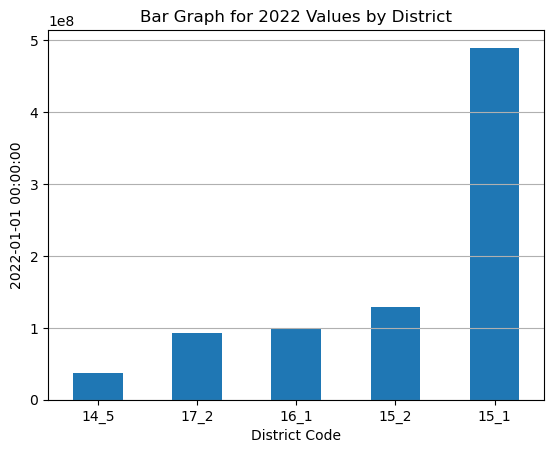

In [28]:
last= estamps_2022.columns[-1]

estamps_2022.plot.bar(x='dist_code', y=last, rot=0, legend=False)
plt.title('Bar Graph for 2022 Values by District')
plt.xlabel('District Code')
plt.ylabel(last)
plt.grid(axis='y')
plt.show()

## Question 3

In [29]:
total_revenue = df.groupby('year').agg({
    'documents_registered_rev': 'sum',
    'estamps_challans_rev': 'sum'
}).reset_index()

# Displaying the result
print(total_revenue)



   year  documents_registered_rev  estamps_challans_rev
0  2019               47418675202                     0
1  2020               34150978720            5007985113
2  2021               77727394929           78485981190
3  2022              108694991942          109694310421
4  2023               27237232964           27493477534


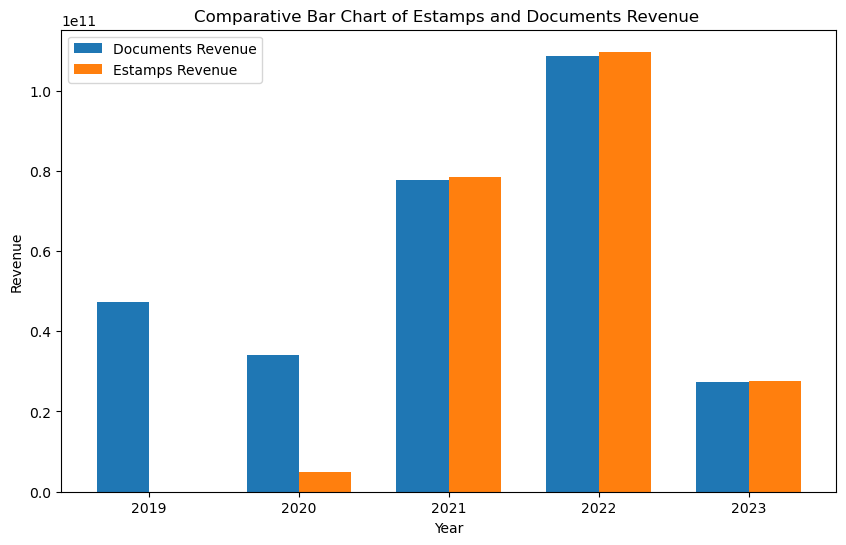

In [30]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
bar_positions_documents = total_revenue['year']
bar_positions_estamps = bar_positions_documents + bar_width

plt.bar(bar_positions_documents, total_revenue['documents_registered_rev'], width=bar_width, label='Documents Revenue')
plt.bar(bar_positions_estamps, total_revenue['estamps_challans_rev'], width=bar_width, label='Estamps Revenue')

plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Comparative Bar Chart of Estamps and Documents Revenue ')
plt.xticks(bar_positions_documents + bar_width / 2, total_revenue['year'])
plt.legend()

# Show the plot
plt.show()

The estamps challan was implemented in 2020, the visible revenue difference during 2020 can be attributed to lack of awareness or perhaps skepticism. However, since 2021, the revenues have been comparable. 

In [31]:
filtered_data = result_df[result_df['year'].isin([2021, 2022])]

# Display the new table
print(filtered_data)

    dist_code  year  documents_registered_cnt  documents_registered_rev  \
2        14_1  2021                     30609                 782919016   
3        14_1  2022                     34673                1158473523   
7        14_2  2021                     19922                 268195229   
8        14_2  2022                     17392                 345533466   
12       14_3  2021                     25100                 329020629   
..        ...   ...                       ...                       ...   
148      23_1  2022                     51830                1431240894   
152      23_2  2021                     33752                 733097750   
153      23_2  2022                     34527                1049180140   
157      23_3  2021                     60911                1393580693   
158      23_3  2022                     66079                2155057915   

     estamps_challans_cnt  estamps_challans_rev  
2                   31796             794968100  

C:\Users\Hp\AppData\Local\Temp\ipykernel_14732\2475267701.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cluster_estamps'] = kmeans.fit_predict(scaled_data)


Cluster Centers based on Estamps Revenue and Counts:
[[4.63318939e+08 1.87327174e+04]
 [2.78263906e+10 2.12686750e+05]
 [3.96871844e+09 5.93161429e+04]]


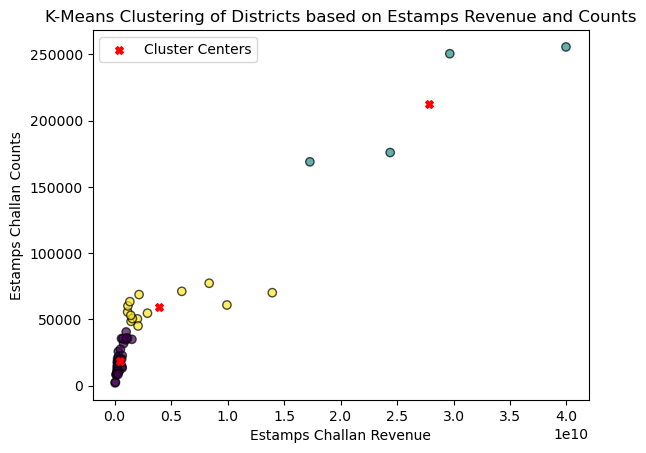

In [32]:
# Selecting features for clustering
data_for_clustering = filtered_data[['estamps_challans_rev', 'estamps_challans_cnt']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Choosing the number of clusters (3 in this case)
kmeans = KMeans(n_clusters=3, random_state=42)
filtered_data['cluster_estamps'] = kmeans.fit_predict(scaled_data)

# Displaying the cluster centers
print("Cluster Centers based on Estamps Revenue and Counts:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Visualizing the clusters
plt.scatter(filtered_data['estamps_challans_rev'], filtered_data['estamps_challans_cnt'], c=filtered_data['cluster_estamps'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], s=30, c='red', marker='X', label='Cluster Centers')
plt.xlabel('Estamps Challan Revenue')
plt.ylabel('Estamps Challan Counts')
plt.title('K-Means Clustering of Districts based on Estamps Revenue and Counts')
plt.legend()
plt.show()

## Transportation
5. Investigate whether there is any correlation between vehicle sales and 
specific months or seasons in different districts. Are there any months 
or seasons that consistently show higher or lower sales rate, and if yes, 
what could be the driving factors? (Consider Fuel-Type category only)
6. How does the distribution of vehicles vary by vehicle class 
(MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different 
districts? Are there any districts with a predominant preference for a 
specific vehicle class? Consider FY 2022 for analysis.
7. List down the top 3 and bottom 3 districts that have shown the highest 
and lowest vehicle sales growth during FY 2022 compared to FY 
2021? (Consider and compare categories: Petrol, Diesel and Electric)

In [33]:
df_T= pd.read_csv("fact_transport.csv")

In [34]:
print(df_T)

     dist_code       month  fuel_type_petrol  fuel_type_diesel  \
0         15_1  01-04-2019             17910              3011   
1         18_2  01-04-2019              3066               306   
2         20_3  01-04-2019              1577               215   
3         21_3  01-04-2019              1961               281   
4         21_7  01-04-2019              1552               309   
...        ...         ...               ...               ...   
1435      16_1  01-03-2023             24112              2169   
1436      14_4  01-03-2023               996               286   
1437      20_3  01-03-2023               886               183   
1438      23_3  01-03-2023              1659               472   
1439      18_2  01-03-2023              1767               239   

      fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                     76                22                    15308   
1                      6                 0                     29

In [35]:
sort_by_district= df_T.sort_values(by=['dist_code','month'])
sort_by_district

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport
276,14_1,01-01-2020,3095,1185,2,0,3008,209,275,342,448,3723,526,31,4184,98,3575,707
638,14_1,01-01-2021,3580,791,6,2,3332,302,38,288,419,4016,331,32,4253,126,3945,434
995,14_1,01-01-2022,1863,376,41,6,1727,243,36,85,195,1991,260,33,2169,117,2058,228
1373,14_1,01-01-2023,1529,377,47,150,1416,209,209,64,205,1654,373,74,1969,134,1702,401
303,14_1,01-02-2020,4180,1261,2,0,4040,286,242,427,448,4830,531,82,5305,138,4771,672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,23_3,01-11-2022,852,290,13,29,752,137,21,146,128,1013,150,21,1094,90,1039,145
251,23_3,01-12-2019,1949,692,0,524,1801,329,625,127,283,2155,964,46,3090,75,2269,896
615,23_3,01-12-2020,2198,486,4,31,1890,337,41,241,210,2328,351,36,2606,113,2494,225
974,23_3,01-12-2021,1770,256,18,106,1412,379,105,83,171,1656,445,49,2044,106,1882,268


In [37]:
sort_by_district['month'] = pd.to_datetime(sort_by_district['month'], format='%d-%m-%Y')

# Create a new column for the season
sort_by_district['season'] = sort_by_district['month'].dt.month // 3 % 4 + 1

In [38]:
sort_by_district

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,season
276,14_1,2020-01-01,3095,1185,2,0,3008,209,275,342,448,3723,526,31,4184,98,3575,707,1
638,14_1,2021-01-01,3580,791,6,2,3332,302,38,288,419,4016,331,32,4253,126,3945,434,1
995,14_1,2022-01-01,1863,376,41,6,1727,243,36,85,195,1991,260,33,2169,117,2058,228,1
1373,14_1,2023-01-01,1529,377,47,150,1416,209,209,64,205,1654,373,74,1969,134,1702,401,1
303,14_1,2020-02-01,4180,1261,2,0,4040,286,242,427,448,4830,531,82,5305,138,4771,672,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,23_3,2022-11-01,852,290,13,29,752,137,21,146,128,1013,150,21,1094,90,1039,145,4
251,23_3,2019-12-01,1949,692,0,524,1801,329,625,127,283,2155,964,46,3090,75,2269,896,1
615,23_3,2020-12-01,2198,486,4,31,1890,337,41,241,210,2328,351,36,2606,113,2494,225,1
974,23_3,2021-12-01,1770,256,18,106,1412,379,105,83,171,1656,445,49,2044,106,1882,268,1


In [39]:
agg_df = sort_by_district.groupby(['dist_code', 'month', 'season']).agg({
    'fuel_type_petrol': 'sum',
    'fuel_type_diesel': 'sum',
    'fuel_type_electric': 'sum',
    'fuel_type_others': 'sum'
}).reset_index()

In [40]:
correlation = agg_df[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others', 'season']].corr()

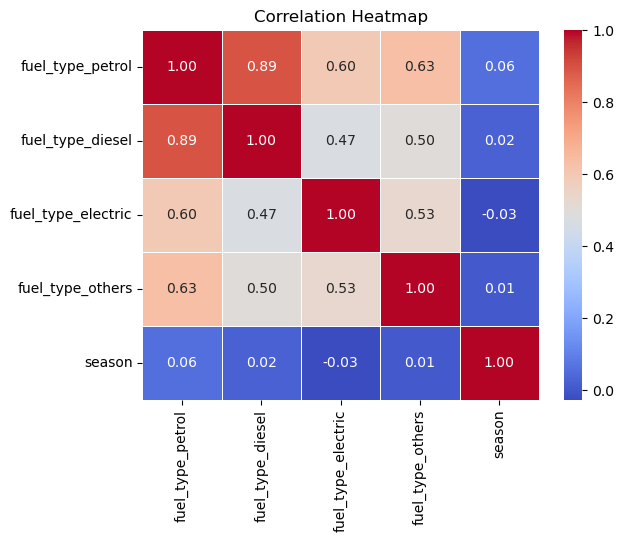

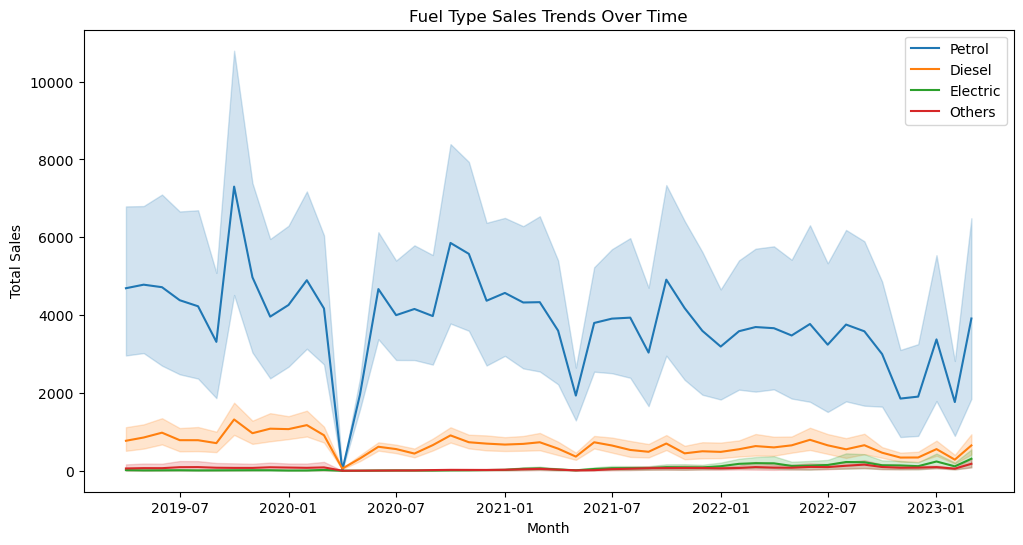

In [41]:

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='fuel_type_petrol', data=agg_df, label='Petrol')
sns.lineplot(x='month', y='fuel_type_diesel', data=agg_df, label='Diesel')
sns.lineplot(x='month', y='fuel_type_electric', data=agg_df, label='Electric')
sns.lineplot(x='month', y='fuel_type_others', data=agg_df, label='Others')
plt.title('Fuel Type Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()



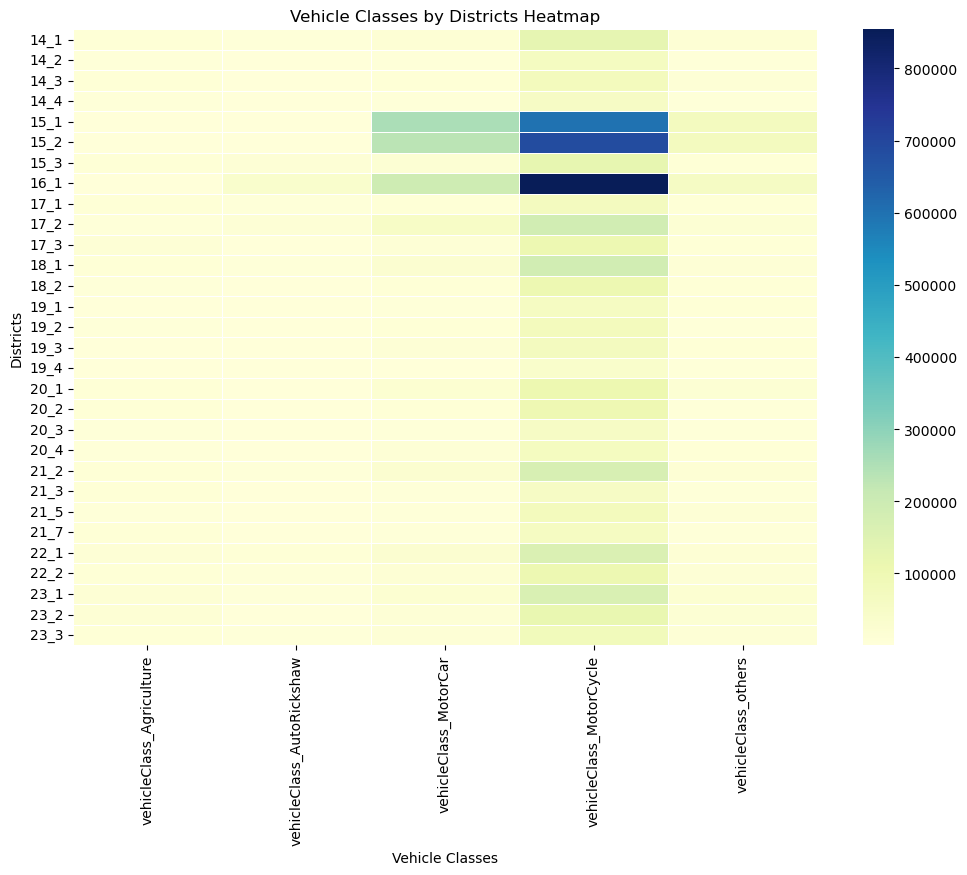

In [42]:
heatmap_data = sort_by_district[['dist_code', 'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_others','vehicleClass_Agriculture']]
heatmap_data_pivot = heatmap_data.pivot_table(index='dist_code', aggfunc='sum').reset_index()

# Set the district code as the index
heatmap_data_pivot.set_index('dist_code', inplace=True)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_pivot, cmap='YlGnBu', annot=False, fmt='d', linewidths=.5)
plt.title('Vehicle Classes by Districts Heatmap')
plt.xlabel('Vehicle Classes')
plt.ylabel('Districts')
plt.show()

15_1, 15_2 and 16_1 have special preference for motorcycles, followed by cars. Moreover, motorcycles in general have higher sales than all other vehicle classes in all districts. I would like to take a closer look at these districts

In [43]:
selected_columns = ['dist_code', 'month', 'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_others']
# Create a new DataFrame with selected columns
vehicleType_df = sort_by_district[selected_columns].copy()


In [44]:
print(vehicleType_df)

     dist_code      month  vehicleClass_MotorCycle  vehicleClass_MotorCar  \
276       14_1 2020-01-01                     3008                    209   
638       14_1 2021-01-01                     3332                    302   
995       14_1 2022-01-01                     1727                    243   
1373      14_1 2023-01-01                     1416                    209   
303       14_1 2020-02-01                     4040                    286   
...        ...        ...                      ...                    ...   
1306      23_3 2022-11-01                      752                    137   
251       23_3 2019-12-01                     1801                    329   
615       23_3 2020-12-01                     1890                    337   
974       23_3 2021-12-01                     1412                    379   
1336      23_3 2022-12-01                      657                    213   

      vehicleClass_AutoRickshaw  vehicleClass_others  
276                 

In [45]:
selected_columns = ['dist_code', 'month', 'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_others']
# Create a new DataFrame with selected columns
vehicle = sort_by_district[selected_columns].copy()

In [46]:
print(vehicle)

     dist_code      month  vehicleClass_MotorCycle  vehicleClass_MotorCar  \
276       14_1 2020-01-01                     3008                    209   
638       14_1 2021-01-01                     3332                    302   
995       14_1 2022-01-01                     1727                    243   
1373      14_1 2023-01-01                     1416                    209   
303       14_1 2020-02-01                     4040                    286   
...        ...        ...                      ...                    ...   
1306      23_3 2022-11-01                      752                    137   
251       23_3 2019-12-01                     1801                    329   
615       23_3 2020-12-01                     1890                    337   
974       23_3 2021-12-01                     1412                    379   
1336      23_3 2022-12-01                      657                    213   

      vehicleClass_AutoRickshaw  vehicleClass_others  
276                 

In [47]:
vehicle['month'] = pd.to_datetime(vehicle['month'])

# Print unique years in the 'month' column
print(vehicle['month'].dt.year.unique())

# Filter for values in the year 2022
vehicle_2022 = vehicle[vehicle['month'].dt.year == 2022]

# Print the resulting DataFrame
print(vehicle_2022)


[2020 2021 2022 2023 2019]
     dist_code      month  vehicleClass_MotorCycle  vehicleClass_MotorCar  \
995       14_1 2022-01-01                     1727                    243   
1049      14_1 2022-02-01                     2058                    303   
1053      14_1 2022-03-01                     1911                    408   
1082      14_1 2022-04-01                     2004                    283   
1133      14_1 2022-05-01                     1733                    280   
...        ...        ...                      ...                    ...   
1200      23_3 2022-08-01                     1389                    338   
1247      23_3 2022-09-01                     1383                    335   
1275      23_3 2022-10-01                     1252                    152   
1306      23_3 2022-11-01                      752                    137   
1336      23_3 2022-12-01                      657                    213   

      vehicleClass_AutoRickshaw  vehicleClass_ot

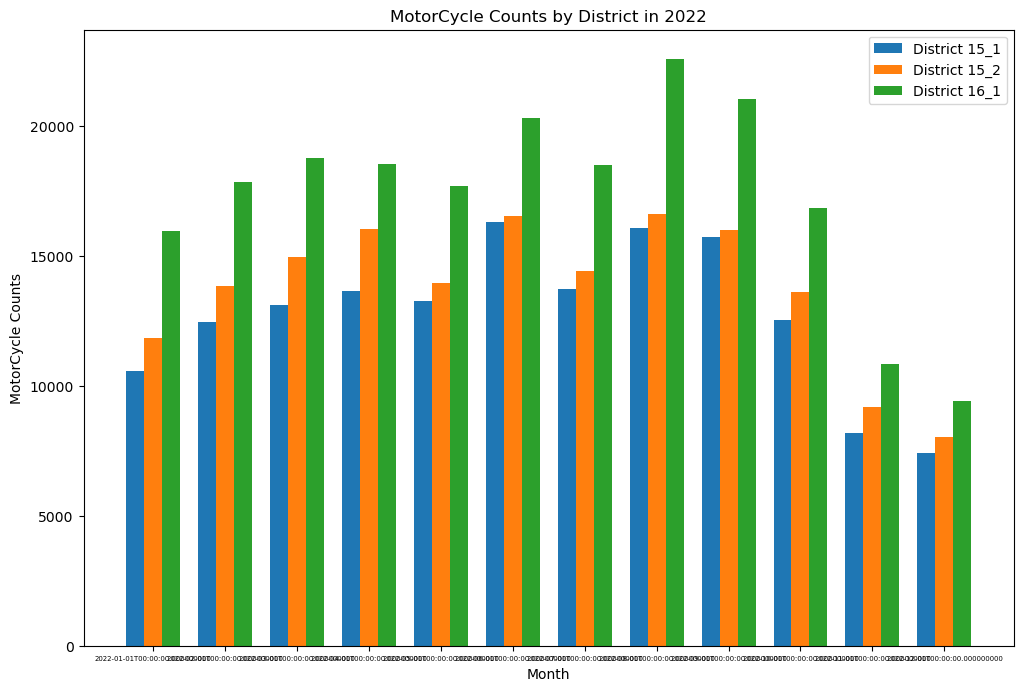

In [52]:

selected_districts = ['15_1', '15_2', '16_1']
filtered_data = vehicle_2022[vehicle_2022['dist_code'].isin(selected_districts)]

# Create the compound bar graph
bar_width = 0.25
bar_positions = range(len(filtered_data['month'].unique()))

fig, ax = plt.subplots(figsize=(12, 8))

for i, district in enumerate(selected_districts):
    district_data = filtered_data[filtered_data['dist_code'] == district]
    ax.bar([pos + i * bar_width for pos in bar_positions], district_data['vehicleClass_MotorCycle'], width=bar_width, label=f'District {district}')

ax.set_xticks([pos + (len(selected_districts) - 1) * bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(filtered_data['month'].unique())
ax.set_xlabel('Month')
ax.set_ylabel('MotorCycle Counts')
ax.set_title('MotorCycle Counts by District in 2022')
ax.tick_params(axis='x', labelsize=5)
ax.legend()

plt.show()



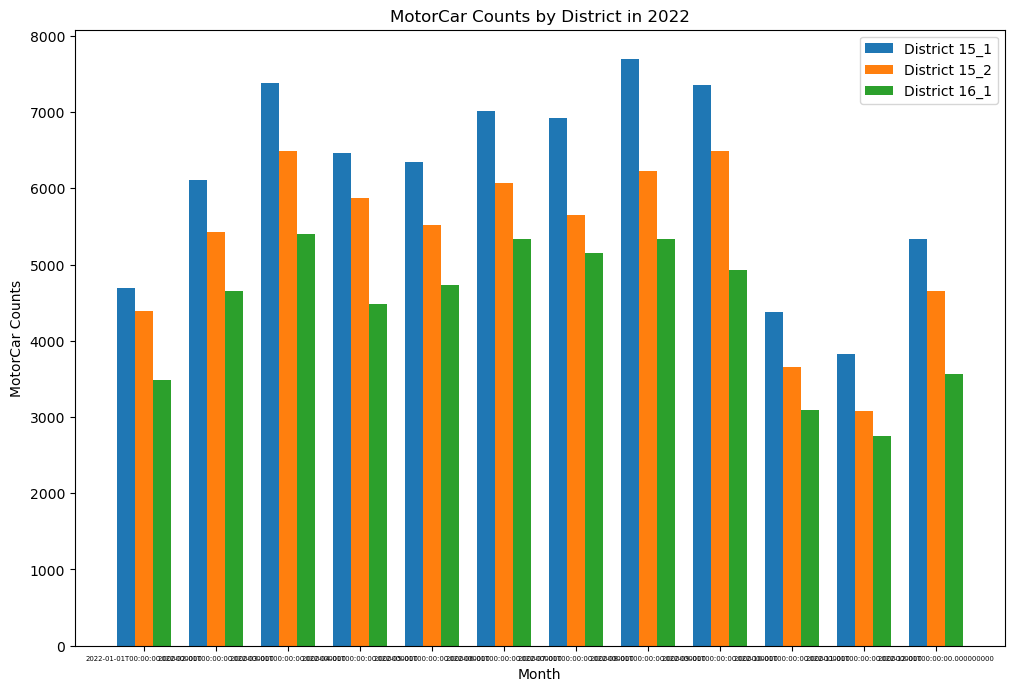

In [51]:
selected_districts = ['15_1', '15_2', '16_1']
filtered_data_car = vehicle_2022[vehicle_2022['dist_code'].isin(selected_districts)]

# Create the compound bar graph
bar_width = 0.25
bar_positions = range(len(filtered_data_car['month'].unique()))

fig, ax = plt.subplots(figsize=(12, 8))

for i, district in enumerate(selected_districts):
    district_data = filtered_data_car[filtered_data_car['dist_code'] == district]
    ax.bar([pos + i * bar_width for pos in bar_positions], district_data['vehicleClass_MotorCar'], width=bar_width, label=f'District {district}')

ax.set_xticks([pos + (len(selected_districts) - 1) * bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(filtered_data_car['month'].unique())
ax.set_xlabel('Month')
ax.set_ylabel('MotorCar Counts')
ax.set_title('MotorCar Counts by District in 2022')
ax.tick_params(axis='x', labelsize=5)
ax.legend()

plt.show()